# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федерального оператора сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля ; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Шаг 1. Откроем файла с данными и изучим общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('chained_assignment', None)
pd.set_option('display.max_columns', None)

In [2]:
calls = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\03_Определение перспективного тарифа для телеком компании\\calls.csv')
calls.info()
display(calls.head(5))
display(calls.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

В датасете Calls пропуски отсутствуют. Замены типа данных требуют только данные столбца 'call_date'.

In [3]:
internet = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\03_Определение перспективного тарифа для телеком компании\\internet.csv')
internet.info()
display(internet.tail(5))
display(internet.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

В датасете internet пропуски отсутствуют. Имеется лишний столбец 'Unnamed: 0', который дублирует значения индекса. Столбец 'session_date' нужно перевести в формат даты.

In [4]:
messages = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\03_Определение перспективного тарифа для телеком компании\\messages.csv')
messages.info()
display(messages.head(5))
display(messages.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Index(['id', 'message_date', 'user_id'], dtype='object')

В датасете messages пропуски отсутствуют. Смены формата данных требует только столбец 'message_date'.

In [5]:
tariffs = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\03_Определение перспективного тарифа для телеком компании\\tariffs.csv')
tariffs.info()
display(tariffs)
display(tariffs.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

В датасете tariffs пропусков нет. Данные, требующие предварительной обработки отсутствуют.

In [6]:
users = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\03_Определение перспективного тарифа для телеком компании\\users.csv')
users.info()
display(users.head(5))
display(users.columns)
users['city'].unique()
display(users['age'].min(), users['age'].max())
users['tariff'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

18

75

array(['ultra', 'smart'], dtype=object)

В датасете пропуски есть только в столбце 'churn_date'. Они объясняются тем, что пользователь всё еще пользуется тарифом. Столбец 'reg_date' необходимо перевести в формат даты.

## Шаг 2. Подготовим данные

### Приведение данных к нужным типам

In [7]:
# Перевод данных в формат даты
def todate(d): 
    if d != 'NaN':
        return pd.to_datetime(d, format = '%Y-%m-%d')
    else:
        return d

In [8]:
calls['call_date'] = calls['call_date'].apply(todate)
internet['session_date'] = internet['session_date'].apply(todate)
messages['message_date'] = messages['message_date'].apply(todate)
users['reg_date'] = users['reg_date'].apply(todate)
users['churn_date'] = users['churn_date'].apply(todate)

### Исправление ошибок в данных

In [9]:
del internet['Unnamed: 0'] 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Был удален лишний столбец датафрейма internet, который дублировал значения индекса.

### Подсчет для каждого пользователя:

#### - количество сделанных звонков и израсходованных минут разговора по месяцам

In [10]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['duration_rounded'] = calls['duration'].apply(math.ceil)
calls_gr = calls.query('duration_rounded != 0').groupby(['user_id', 'month'])['duration_rounded']\
.agg(['sum','count']).reset_index()
calls_gr.set_axis(['user_id', 'month', 'call_duration', 'number_of_calls_per_month'], axis = 'columns', inplace = True)
calls_gr.head()

,user_id,month,call_duration,number_of_calls_per_month
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


#### - количество отправленных сообщений по месяцам

In [11]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_gr = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
messages_gr.set_axis(['user_id', 'month', 'number_of_messages_per_month'], axis = 'columns', inplace = True)
messages_gr.head()

,user_id,month,number_of_messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### - объем израсходованного интернет-трафика по месяцам

In [12]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_gr = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_gr.set_axis(['user_id', 'month', 'mb_used_per_month'], axis = 'columns', inplace = True)
internet_gr['gb_used_per_month'] = np.ceil(internet_gr['mb_used_per_month']/1024)
internet_gr.head()

,user_id,month,mb_used_per_month,gb_used_per_month
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0


#### - помесячная выручка с каждого пользователя

In [13]:
data_m = calls_gr.merge(messages_gr, on = ['user_id', 'month'], how = 'outer')
data_m = data_m.merge(internet_gr, on = ['user_id', 'month'], how = 'outer')
data_m = data_m.fillna(0).astype(int)
data_m = data_m.merge(users[['user_id','tariff','city']], on='user_id', how = 'left')
display(data_m.head())

,user_id,month,call_duration,number_of_calls_per_month,number_of_messages_per_month,mb_used_per_month,gb_used_per_month,tariff,city
0,1000,5,159,17,22,2253,3,ultra,Краснодар
1,1000,6,172,28,60,23233,23,ultra,Краснодар
2,1000,7,340,41,75,14003,14,ultra,Краснодар
3,1000,8,408,42,81,14055,14,ultra,Краснодар
4,1000,9,466,46,57,14568,15,ultra,Краснодар


In [14]:
# функция для расчета помесячной прибыли
def monthly_profit(row): 
    t = row['tariff']
    t = tariffs.query('tariff_name == @t').reset_index()
    mes_i, mb_i, min_i, mon_fee, rub_gb, rub_mes, rub_min = t.loc[0, 'messages_included'], t.loc[0, 'mb_per_month_included'], t.loc[0, 'minutes_included'], t.loc[0, 'rub_monthly_fee'], t.loc[0, 'rub_per_gb'], t.loc[0, 'rub_per_message'], t.loc[0, 'rub_per_minute']
    if row['call_duration'] - min_i > 0:
        mon_fee +=  (row['call_duration'] - min_i) * rub_min
    if row['number_of_messages_per_month'] - mes_i > 0:
        mon_fee +=  (row['number_of_messages_per_month'] - mes_i) * rub_mes
    if row['gb_used_per_month'] - (mb_i//1024) > 0:
        mon_fee +=  (row['gb_used_per_month'] - (mb_i//1024)) * rub_gb
    return mon_fee

In [15]:
data_m['monthly_profit'] = data_m.apply(monthly_profit, axis = 1)
display(data_m.head())

,user_id,month,call_duration,number_of_calls_per_month,number_of_messages_per_month,mb_used_per_month,gb_used_per_month,tariff,city,monthly_profit
0,1000,5,159,17,22,2253,3,ultra,Краснодар,1950
1,1000,6,172,28,60,23233,23,ultra,Краснодар,1950
2,1000,7,340,41,75,14003,14,ultra,Краснодар,1950
3,1000,8,408,42,81,14055,14,ultra,Краснодар,1950
4,1000,9,466,46,57,14568,15,ultra,Краснодар,1950


## Шаг 3. Анализ данных

Необходимо описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Нужно посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы и описать распределения.

In [16]:
# функция рассчета среднего значения
def aver_f(col, par): 
    return data_m.query('tariff == @par')[col].mean()

# функция рассчета дисперсии
def var_f(col, par): 
    return np.var(data_m.query('tariff == @par')[col], ddof=1)

# функция рассчета стандартного отклонения
def dev_f(col, par): 
    return np.std(data_m.query('tariff == @par')[col], ddof=1)

# выведение показателей по определенному параметру
def desc_f(col): 
    print(' Среднее значение параметра', col, 'для пользователей тарифа "Smart"(в месяц):', round(aver_f(col, 'smart'),1),'\n',\
         'Среднее значение параметра', col, 'для пользователей тарифа "Ultra"(в месяц):', round(aver_f(col, 'ultra'), 1),'\n',\
         'Дисперсия параметра', col, 'для пользователей тарифа "Smart"(в месяц):', round(var_f(col, 'smart'), 1),'\n',\
         'Дисперсия параметра', col, 'для пользователей тарифа "Ultra"(в месяц):', round(var_f(col, 'ultra'), 1),'\n',\
         'Стандартное отклонение параметра', col, 'для пользователей тарифа "Smart"(в месяц):', round(dev_f(col, 'smart'), 1),'\n',\
         'Стандартное отклонение параметра', col, 'для пользователей тарифа "Ultra"(в месяц):', round(dev_f(col, 'ultra'), 1))

    
# функция для построения гистограмм по определенному параметру    
def graf(col, xlab, titl, bins): 
    plt.figure(figsize=(14, 5))
    plt.hist(data_m.query('tariff == "smart"')[col], bins, alpha=0.5, label='Пользователи тарифа "Smart"')
    plt.hist(data_m.query('tariff == "ultra"')[col], bins, alpha=0.5, label='Пользователи тарифа "Ultra"')
    plt.xlabel(xlab)
    plt.legend(loc='upper right')
    plt.title(titl)
    plt.grid(True)
    plt.show()

### Анализ данных по длительности звонков

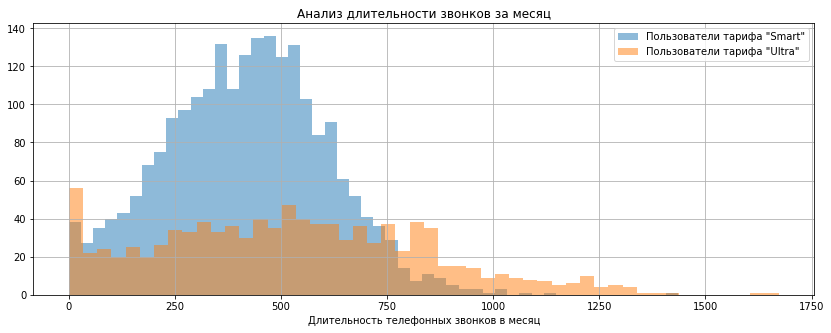

In [17]:
graf('call_duration', 'Длительность телефонных звонков в месяц', 'Анализ длительности звонков за месяц', 50)

In [18]:
desc_f('call_duration')

 Среднее значение параметра call_duration для пользователей тарифа "Smart"(в месяц): 417.9 
 Среднее значение параметра call_duration для пользователей тарифа "Ultra"(в месяц): 526.6 
 Дисперсия параметра call_duration для пользователей тарифа "Smart"(в месяц): 36219.3 
 Дисперсия параметра call_duration для пользователей тарифа "Ultra"(в месяц): 100873.6 
 Стандартное отклонение параметра call_duration для пользователей тарифа "Smart"(в месяц): 190.3 
 Стандартное отклонение параметра call_duration для пользователей тарифа "Ultra"(в месяц): 317.6


In [19]:
data_m.groupby('tariff').call_duration.agg(['mean','std','var']).round(2)

,mean,std,var
tariff,,,
smart,417.93,190.31,36219.32
ultra,526.62,317.61,100873.63


Исходя из графика распределения, имеющего колоколообразный вид, можно сказать, что большая часть значений пользователей тарифа "Smart" говорит по телефону 350-550 минут в месяц (очевидно сказывается ограничение тарифа по бесплатным минутам), распределение похоже на нормальное. Значения более 850 минут встречаются редко. 
График распределения значений для пользователей тарифа "Ultra" растянут по оси длительности звонков, распределение выглядит нормальным со слабовыраженным пиком около 500 минут.
Среди пользователей обоих тарифов есть те, кто в определенные месяцы не совершал звонков. Отсюда пики нулевых на обоих графиках. Несмотря на то, что эти значения влияют на показатели, описывающие эти данные(среднее, дисперсия, среднее отклонение), избавиться от них мы не можем.

### Анализ данных по отправленным СМС

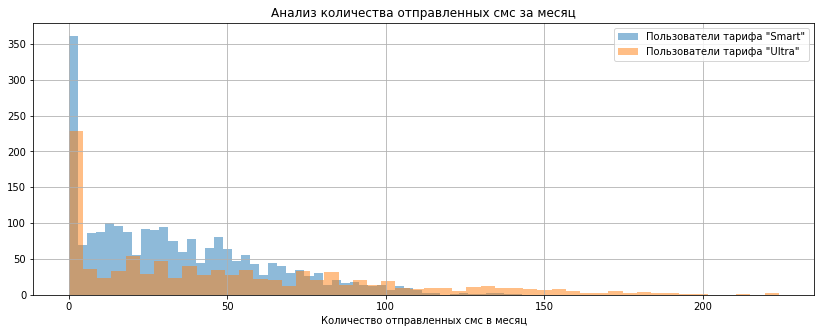

In [20]:
graf('number_of_messages_per_month', 'Количество отправленных смс в месяц', 'Анализ количества отправленных смс за месяц', 50)

In [21]:
desc_f('number_of_messages_per_month')

 Среднее значение параметра number_of_messages_per_month для пользователей тарифа "Smart"(в месяц): 33.4 
 Среднее значение параметра number_of_messages_per_month для пользователей тарифа "Ultra"(в месяц): 49.4 
 Дисперсия параметра number_of_messages_per_month для пользователей тарифа "Smart"(в месяц): 796.8 
 Дисперсия параметра number_of_messages_per_month для пользователей тарифа "Ultra"(в месяц): 2285.3 
 Стандартное отклонение параметра number_of_messages_per_month для пользователей тарифа "Smart"(в месяц): 28.2 
 Стандартное отклонение параметра number_of_messages_per_month для пользователей тарифа "Ultra"(в месяц): 47.8


Гистограммы распределения пользователей по отправленным смс обоих тарифов похожи на гистограммы распределения длительности звонков. Большая часть значений для тарифа "Smart" сосредоточена в промежутке до 50 штук, что связано с ограничением самого тарифа.
Значения для тарифа "Ultra" снова растянуты, как и в случае со звонками.
Нулевых значений относительно остальных в случае смс намного больше, чем нулевых значений звонков. Но не брать их во внимание было бы ошибкой. Нулевое значение тоже значение.

### Анализ данных по использованию интернет-траффика

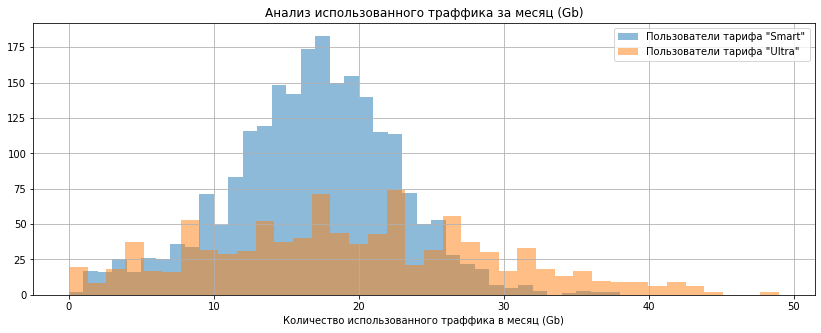

In [22]:
graf('gb_used_per_month', 'Количество использованного траффика в месяц (Gb)', 'Анализ использованного траффика за месяц (Gb)', 38)

In [23]:
desc_f('gb_used_per_month')

 Среднее значение параметра gb_used_per_month для пользователей тарифа "Smart"(в месяц): 16.3 
 Среднее значение параметра gb_used_per_month для пользователей тарифа "Ultra"(в месяц): 19.5 
 Дисперсия параметра gb_used_per_month для пользователей тарифа "Smart"(в месяц): 33.0 
 Дисперсия параметра gb_used_per_month для пользователей тарифа "Ultra"(в месяц): 97.1 
 Стандартное отклонение параметра gb_used_per_month для пользователей тарифа "Smart"(в месяц): 5.7 
 Стандартное отклонение параметра gb_used_per_month для пользователей тарифа "Ultra"(в месяц): 9.9


Распределение использования интернет-траффика пользователей тарифа "Smart" похоже на нормальное, имеет колоколообразную форму, с пиком в районе 16-17 Гб. Распределение пользователей тарифа "Ultra" не имеет такой выраженной формы, но растянуто по горизонтальной оси.
Более половины пользователей тарифа "Smart" часто превышают бесплатный ежемесячный лимит Гб, а это дополнительная прибыль с каждого клиента. Пользователи тарифа "Ultra" не так часто превышают лимит.
Так же выделяется практически отсутствующие нулевые значения, доступом в интернет пользуются практически все практически каждый месяц.

## Шаг 4. Проверка гипотез

### Гипотеза А: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевую гипотезу. Так как она всегда формулируется так, чтобы использовать знак равенства, значит наша нулевая гипотеза выглядит так: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Соответственно альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

In [24]:
alpha = 0.05
results = st.ttest_ind(data_m.query('tariff == "smart"')['monthly_profit'], \
                       data_m.query('tariff == "ultra"')['monthly_profit'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Так как отвергнута нулевая гипотеза, которая говорила о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт», то можно сказать, что средняя выручка пользователей разных тарифов не равна. Гипотеза А не отвергается.

In [25]:
print('Количество оплаченных тарифов "Smart" -', data_m.query('tariff == "smart"')['monthly_profit'].count(), 
      'шт., средняя выручка -', round(data_m.query('tariff == "smart"')['monthly_profit'].mean()), 
      'руб., итоговая выручка - ', (data_m.query('tariff == "smart"')['monthly_profit'].count() * 
                                   round(data_m.query('tariff == "smart"')['monthly_profit'].mean())), 'руб.\n'
      'Количество оплаченных тарифов "Ultra" -', data_m.query('tariff == "ultra"')['monthly_profit'].count(),
      'шт., средняя выручка -', round(data_m.query('tariff == "ultra"')['monthly_profit'].mean()),
     'руб., итоговая выручка - ', (data_m.query('tariff == "ultra"')['monthly_profit'].count() * 
                                   round(data_m.query('tariff == "ultra"')['monthly_profit'].mean())), 'руб.')

Количество оплаченных тарифов "Smart" - 2229 шт., средняя выручка - 1290 руб., итоговая выручка -  2875410 руб.
Количество оплаченных тарифов "Ultra" - 985 шт., средняя выручка - 2070 руб., итоговая выручка -  2038950 руб.


Несмотря на то, что средняя месячная выручка пользователей тарифа "Smart" меньше оной пользователей "Ultra" на 40%, за счет большего числа оплаченных тарифов "Smart" суммарная выручка от них больше на 30%.

### Гипотеза Б: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформируем нулевую гипотезу: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Тогда альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

In [26]:
alpha = 0.05
results = st.ttest_ind(data_m.query('city == "Москва"')['monthly_profit'], 
                       data_m.query('city != "Москва"')['monthly_profit'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, значит можно сказать, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Гипотеза Б отвергается.

In [27]:
print('Количество оплат тарифов в Москве -', data_m.query('city == "Москва"')['monthly_profit'].count(), 
      'шт., средняя выручка -', round(data_m.query('city == "Москва"')['monthly_profit'].mean()), 
      'руб., итоговая выручка - ', (data_m.query('city == "Москва"')['monthly_profit'].count() * 
                                   round(data_m.query('city == "Москва"')['monthly_profit'].mean())), 'руб.\n'
      'Количество оплат тарифов не в Москве -', data_m.query('city != "Москва"')['monthly_profit'].count(),
      'шт., средняя выручка -', round(data_m.query('city != "Москва"')['monthly_profit'].mean()),
     'руб., итоговая выручка - ', (data_m.query('city != "Москва"')['monthly_profit'].count() * 
                                   round(data_m.query('city != "Москва"')['monthly_profit'].mean())), 'руб.')

Количество оплат тарифов в Москве - 611 шт., средняя выручка - 1547 руб., итоговая выручка -  945217 руб.
Количество оплат тарифов не в Москве - 2603 шт., средняя выручка - 1525 руб., итоговая выручка -  3969575 руб.


Разница в средней выручке практически отсутствует, но из-за преобладания региональных оплат тарифов более чем в 4 раза, итоговая выручка от других регионов больше выручки от Москвы в 4 раза. 

## Выводы

В данной работе были проанализированы данные по 500 абонентам компании «Мегалайн», пользователям тарифов «Смарт» и «Ультра».
Данные предоставлялись в 5 датасетах: данные о пользователях, условия тарифов,данные по звонкам, данные по смс и данные по использованию интернет-траффика.
Датасеты были обработанны, сгруппированы по пользователям и месяцам и собраны в один датасет, что позволило проанализировать их и ответить на поставленные вопросы и сделать определенные выводы:
* Оказалось, что пользователи "Smart" в среднем в месяц разговаривают по телефону 418 минут, а пользователи тарифа "Ultra" 527 минут, при это нередки случаи, когда за месяц абонент не сделал ни одного звонка. Среди абонентов "Smart" так же не редки случая исчерпания лимита минут и покупки их отдельно.
* Что касается смс, то в среднем в месяц пользователи "Smart" отправляют 33 смс(но не редки случаи, когда лимит исчерпывался пользователем), пользователи тарифа "Ultra" - 49. Количество случаев, когда за месяц не было отправлено ни одной смс, намного больше, чем в случае с телефонными разговорами. Смс вытесняются различными интернет-мессенджерами и необходимость в них возникает все реже и реже.
* Интернет-траффик используют практически всегда, это самая используемая услуга из трех. Более половины пользователей тарифа "Smart" часто превышают бесплатный ежемесячный лимит Гб, тем самым генерируя дополнительную прибыль с каждого клиента. Пользователи тарифа "Ultra" тоже превышают лимит, хоть и не так часто.

Так же нами были проверены 2 гипотезы. Гипотеза А: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Данную гипотезу не получилось отвергнуть, значит вероятнее всего средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Гипотеза Б: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Её мы отвергли, потому что средние выручки практически не отличаются.

Что касается суммарной выгоды пользователей, то на основании представленных данных можно сказать:
1. _Суммарная выручка от тарифа "Smart" больше на 30% по сравнению с вырочкой от "Ultra". Так сложилось из-за того, что оплат тарифа "Smart" больше "Ultra" в 2.3 раза, при средней ежемесячной выручке в 1290 руб.("Smart") и 2070 руб.("Ultra")._
2. _Суммарная прибыль от оплаченных тарифов из Москвы и других регионов различается в 4 раза в пользу регионов, так как региональных оплат больше в 4 раза._

**Имеет смысл вкладывать рекламные бюджеты в продвижение услуг данного оператора в регионах и конкретно тарифа "Smart".**